### MODULE 3 - MAGAZINE SUBSCRIPTION

In [1]:
#Import packages needed

import bamboolib as bam
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression # needed for regression
from sklearn.model_selection import train_test_split # data split
from sklearn.metrics import classification_report, confusion_matrix # accuracy and precision
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # decision tree and feature importance
import statsmodels.api as smf # regression
from sklearn.svm import SVC # support-vector network model

In [2]:
# load data set
magazine = pd.read_excel("/Users/damilolaodunuga/Downloads/PC File/ALY 6020/marketing_data.xlsx")
magazine

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


#### Part 1 - Data Cleaning

In [3]:
## Finding null values 
magazine.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [4]:
# Replace missing value
magazine[['Income']] = magazine[['Income']].fillna(magazine[['Income']].mean())

In [5]:
magazine.isnull().values.any()

False

In [6]:
# Convert birth year to Age
magazine['Age'] = (2022 - magazine['Year_Birth'])
magazine.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,41


In [7]:
# convert Dt_customer to years of membership

magazine["Dt_Customer"] = pd.to_datetime(magazine["Dt_Customer"])

magazine["membership"] = magazine["Dt_Customer"].apply(lambda x : (pd.datetime.now().year - x.year))
magazine.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,membership
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,65,10
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,68,8
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,57,9
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,38,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,41,8


#### EDA

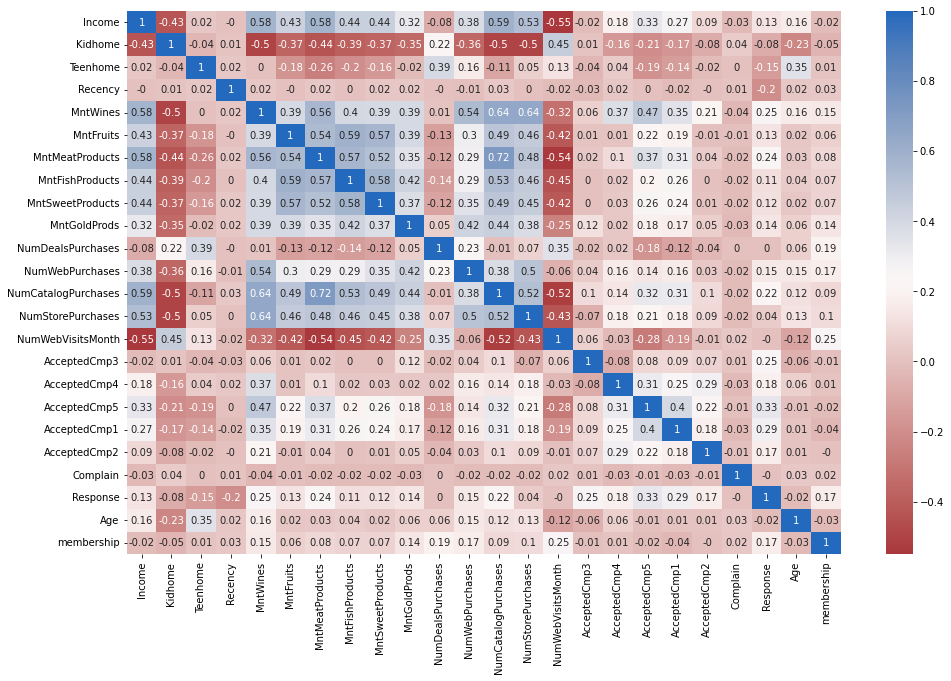

In [8]:
# Correlation plot
mag = magazine.drop(['Year_Birth', 'ID', 'Z_CostContact', 'Z_Revenue'], axis = 'columns')
plt.subplots(figsize=(16,10))
sns.heatmap(mag.corr().round(2), annot=True, cmap='vlag_r')
plt.show()

In [9]:
magazine.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


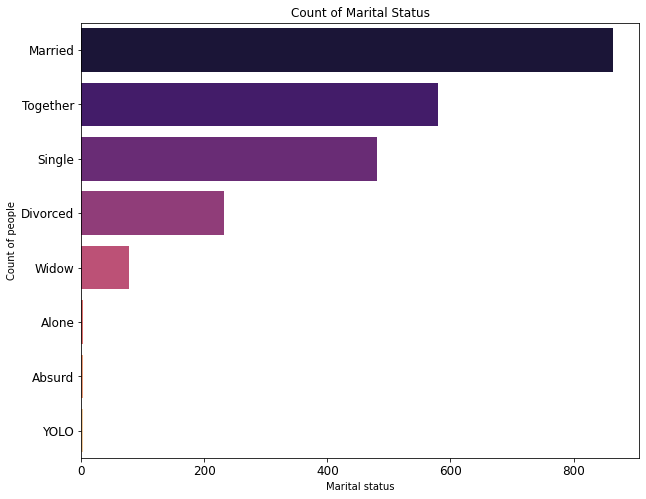

In [10]:
# Bar plot of marital status
plt.figure(figsize=(10,8))

marriage = magazine["Marital_Status"].value_counts()
sns.barplot(marriage.values, marriage.index, palette='magma')
plt.title('Count of Marital Status')
plt.xlabel('Marital status')
plt.ylabel('Count of people')
plt.tick_params(labelsize=12)
plt.show()

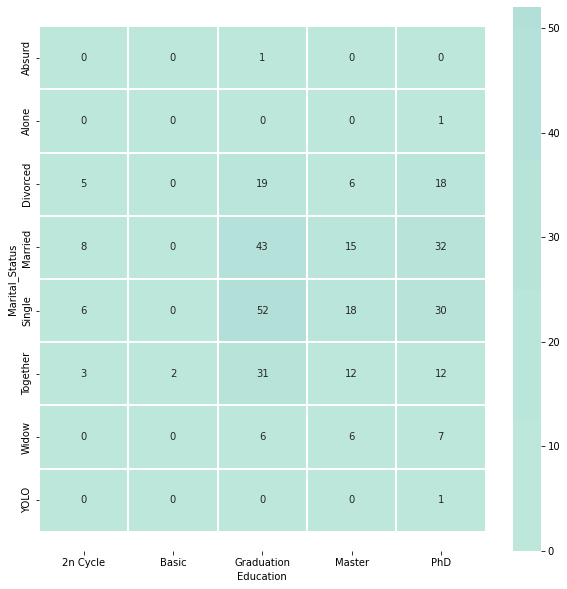

In [11]:
#Pivot table to build a heatmap between the income type and housing type
pivot_table2 = pd.pivot_table(data = magazine, index = ['Marital_Status'], columns = ['Education'], values = 'Response', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[10,10])
hm = sns.heatmap(data = pivot_table2, annot = True, fmt='.0f', linewidths=.1, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.3, top - 0.3)
plt.show()

#### Part 2 - Logistic Regression

In [12]:
# Label encoding to convert education and marital status to integer
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

magazine["education"] = labelencoder.fit_transform(magazine["Education"])
magazine["marital"] = labelencoder.fit_transform(magazine["Marital_Status"])

magazine.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,membership,education,marital
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,65,10,2,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,68,8,2,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,57,9,2,5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,38,8,2,5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,41,8,4,3


In [13]:
# Final check of null values
magazine.isnull().values.any()

False

To determine decline in magazine subscription, we use response column as dependent variables and the other variables as independent variables.

In [14]:
# X and Y variables

X = magazine.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis = 'columns')
Y = magazine.Response


In [15]:
#split X and Y
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)
len(X_train), len(X_test)

(1568, 672)

In [16]:
# fitting the model using Sklearn
log_reg1 = LogisticRegression()
model1 = log_reg1.fit(X_train, Y_train)
threshold = 0.5

# Predict y using x_test
y_predict = log_reg1.predict(X_test)

Text(0.5, 257.44, 'Predicted')

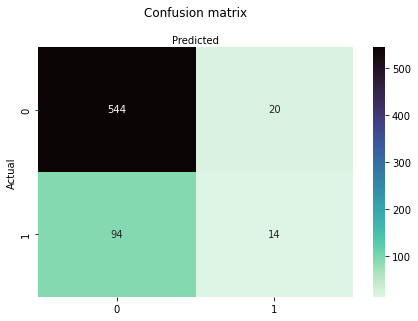

In [17]:
# confusion matrix
magazine_cf = confusion_matrix(Y_test, y_predict)
magazine_cf

# name of classes
class_names=[0,1]
fig, ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(magazine_cf), annot=True, cmap='mako_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [18]:
# Classification report
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91       564
           1       0.41      0.13      0.20       108

    accuracy                           0.83       672
   macro avg       0.63      0.55      0.55       672
weighted avg       0.78      0.83      0.79       672



In [19]:
# Generate coefficient and p-value for the model
from sklearn.feature_selection import f_regression

freg=f_regression(X_train, Y_train)

p=freg[1]

pd.DataFrame(zip(X_train.columns, np.transpose(log_reg1.coef_), np.transpose(p.round(4))), columns=['features', 'coefficient', 'p-value']) 

,features,coefficient,p-value
0,Income,[-1.5417625327061123e-05],0.0000
1,Kidhome,[0.00030512100188109803],0.0025
2,Teenhome,[-0.001290003411817371],0.0000
3,Recency,[-0.023873285933487774],0.0000
4,MntWines,[0.0021484875654733493],0.0000
5,MntFruits,[-0.0009535940419957886],0.0000
6,MntMeatProducts,[0.002379893821930348],0.0000
7,MntFishProducts,[-0.002720450263413828],0.0000
8,MntSweetProducts,[0.0013793806252476962],0.0000
9,MntGoldProds,[0.0026334231583165025],0.0000


#### Part 3 - AUC and ROC

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# ROC without the probability of predicted values
roc_auc_score(Y_test, y_predict)

0.5470843183609141

In [21]:
# probability of predict values
probs = log_reg1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

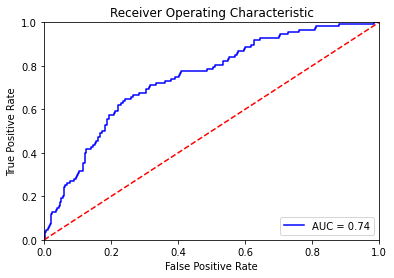

In [22]:
# plot ROC curve with probability of predicted values
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()